## Applying Linear Regression Model

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pylab as plt
from sklearn import metrics
#%matplotlib inline
from  sklearn.cross_validation import train_test_split
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [189]:
data_X = pd.read_csv('X_modified.csv')
data_y = pd.read_csv('y_modified.csv')

In [190]:
#Spliting the dataset into training and testing set

X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,random_state =0)

In [191]:
model = sm.OLS(y_train, X_train)
fit=model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:         Power_Produced   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     4667.
Date:                Mon, 24 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:17:53   Log-Likelihood:                -43115.
No. Observations:                6570   AIC:                         8.625e+04
Df Residuals:                    6562   BIC:                         8.630e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Dew_Point             -3.8554      0

In [192]:
y_pred =(fit.predict(X_test))


In [193]:
y_test_list = y_test['Power_Produced'].tolist()


### So the  linear regression model is not a good model 

In [194]:
print("Length of testing data")
print(len(y_pred))
print(len(y_test))
pred_val = []
actual_val =[]
for i in range (0 , 100):
    pred_val.append(y_pred[i])
    actual_val.append(y_test_list[i])


Length of testing data
2190
2190


In [195]:
pred_series = pd.Series(pred_val)
actual_series = pd.Series(actual_val)

In [196]:
data_plot = pd.DataFrame(pred_val,actual_val)
print(data_plot.head())
data_plot=data_plot.reset_index()
data_plot.head()
col_name = ['Actual_Value','Predicted_Value']
data_plot.columns = col_name
#data_new.plot(stacked=False)

                 0
0.00     38.477461
0.00    -98.042754
5.70    248.158221
0.00   -158.587201
691.98  519.946354


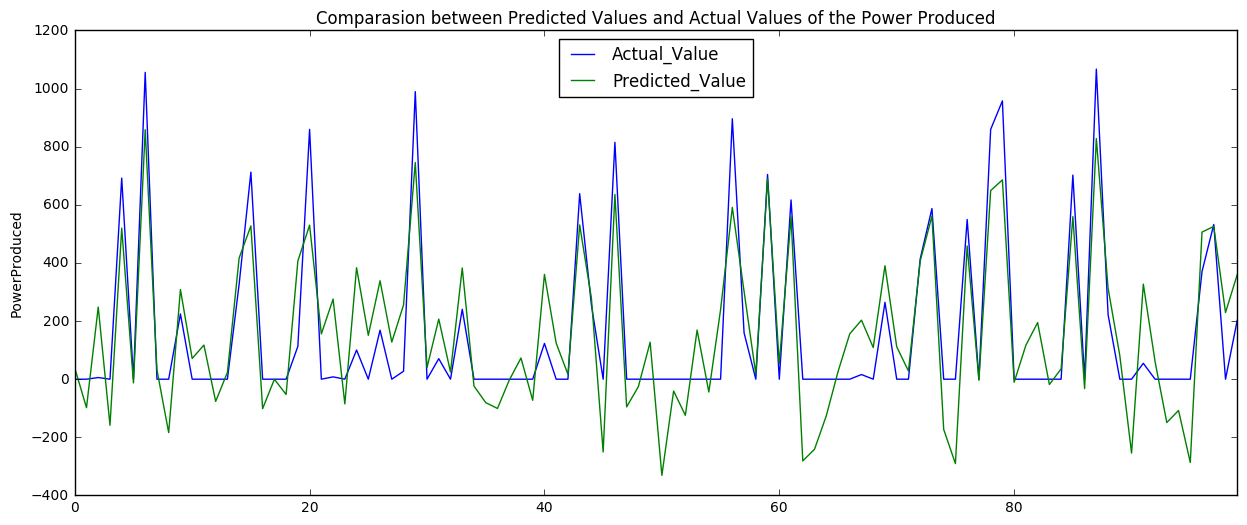

In [197]:
data_plot.plot()
plt.title('Comparasion between Predicted Values and Actual Values of the Power Produced')
plt.ylabel('PowerProduced')
plt.show()

## Poor model

In [198]:
#Printing RMSE value
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

172.563349522
